In [1]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed

Populating the interactive namespace from numpy and matplotlib


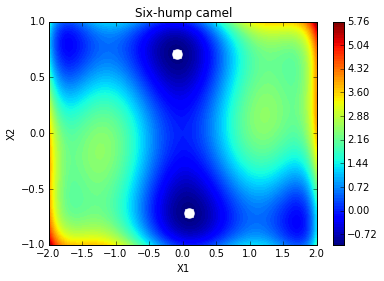

In [2]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

# GP

In [3]:
# Creates three identical objects that we will later use to compare the optimization strategies 
# myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
#                                               domain=bounds,
#                                               model_type = 'deepGP',
#                                               acquisition_type='EI',  
#                                               normalize_Y = True,
#                                               acquisition_weight = 0.1)  

myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 0.1)  

** GPyOpt Bayesian Optimization class initialized succesfuly **


In [4]:
# runs the optimization for the three methods
max_iter = 20  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

   ** Maximum number of iterations reached **


In [5]:
print myBopt2D.model.model


Name : GP regression
Objective : 2.06734543334
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  Mat32.variance           |     3.79498960848  |      +ve      |        
  Mat32.lengthscale        |     1.99305483009  |      +ve      |        
  Gaussian_noise.variance  |  0.00426969720197  |      +ve      |        


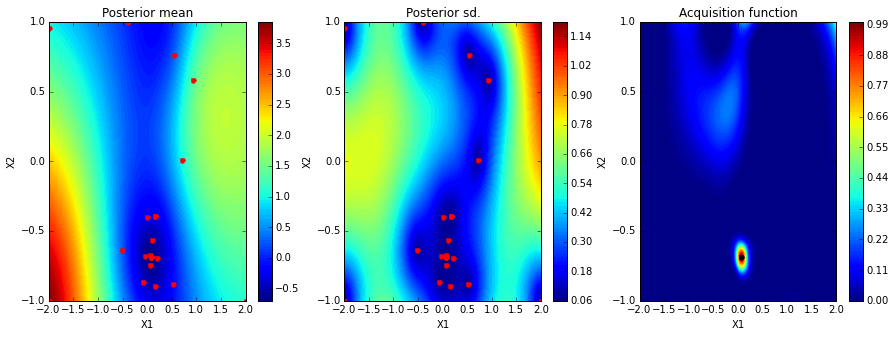

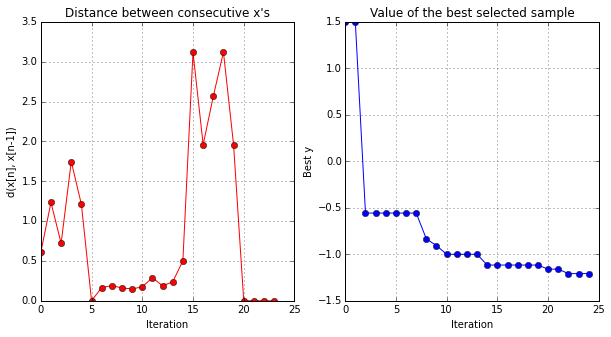

In [6]:
myBopt2D.plot_acquisition()
myBopt2D.plot_convergence()

# DeepGP

In [12]:
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
# f_true.plot()
# Creates three identical objects that we will later use to compare the optimization strategies 

#### The arguments below are not passed to deepGP because the parent class does not propagate them.
### check the modular demo.
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              initial_design_numdata = 3,
                                              model_type = 'deepGP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 0.1)

SNR layer 0:[ 100.]
SNR layer 1:[ 66.93791245]
** GPyOpt Bayesian Optimization class initialized succesfuly **


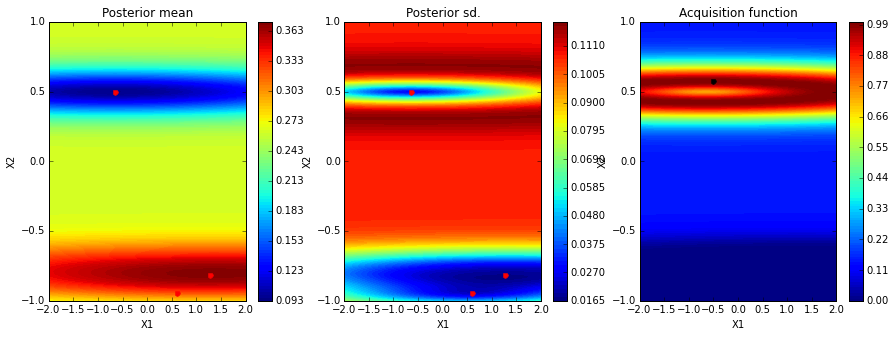

In [8]:
myBopt2D.plot_acquisition()

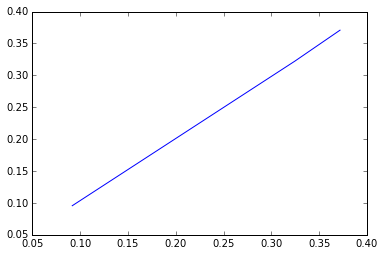

In [10]:
plt.plot(myBopt2D.Y,myBopt2D.model.predict(myBopt2D.X)[0])

In [13]:
print myBopt2D.model.model


Name : deepgp
Objective : 47.2507664117
Number of Parameters : 48
Number of Optimization Parameters : 34
Updates : True
Parameters:
  deepgp.                           |           value  |   constraints   |  priors
  obslayer.inducing inputs          |          (3, 3)  |                 |        
  obslayer.rbf.variance             |  0.590466814476  |       +ve       |        
  obslayer.rbf.lengthscale          |            (3,)  |       +ve       |        
  obslayer.Gaussian_noise.variance  |            0.01  |      fixed      |        
  obslayer.Kuu_var                  |            (3,)  |       +ve       |        
  obslayer.latent space.mean        |          (3, 3)  |     {fixed}     |        
  obslayer.latent space.variance    |          (3, 3)  |  {fixed} {+ve}  |        
  layer_1.inducing inputs           |          (3, 2)  |                 |        
  layer_1.rbf.variance              |  0.924164263659  |       +ve       |        
  layer_1.rbf.lengthscale           |

In [19]:
# runs the optimization for the three methods
max_iter = 15  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

SNR layer 0:[ 171.36972724]
SNR layer 1:[ 26691.07481281]
SNR layer 0:[ 4535.38539249]
SNR layer 1:[ 96107.21044003]
SNR layer 0:[ 1212.7767224]
SNR layer 1:[ 74015.16828497]
SNR layer 0:[ 866.85702883]
SNR layer 1:[ 50566.79029672]
SNR layer 0:[ 321.78779383]
SNR layer 1:[ 82287.97389881]
SNR layer 0:[ 336.12277674]
SNR layer 1:[ 112369.85434651]
SNR layer 0:[ 897.37991547]
SNR layer 1:[ 148170.95431057]
SNR layer 0:[ 684.91609222]
SNR layer 1:[ 92001.01727176]
SNR layer 0:[ 96.26455103]
SNR layer 1:[ 206592.18745081]
SNR layer 0:[ 316.02455146]
SNR layer 1:[ 156528.66814309]
SNR layer 0:[ 219.74860135]
SNR layer 1:[ 186462.03891269]
SNR layer 0:[ 44.0300582]
SNR layer 1:[ 238955.86394081]
SNR layer 0:[ 178.88659167]
SNR layer 1:[ 215167.58769575]
SNR layer 0:[ 164.76659972]
SNR layer 1:[ 189185.36019706]
SNR layer 0:[ 208.92114054]
SNR layer 1:[ 279876.02640839]
SNR layer 0:[ 87.75105474]
SNR layer 1:[ 395859.81402751]
   ** Maximum number of iterations reached **



Name : deepgp
Objective : 130.915326186
Number of Parameters : 240
Number of Optimization Parameters : 156
Updates : True
Parameters:
  deepgp.                           |              value  |   constraints   |  priors
  obslayer.inducing inputs          |            (15, 3)  |                 |        
  obslayer.rbf.variance             |       1.7972122171  |       +ve       |        
  obslayer.rbf.lengthscale          |               (3,)  |       +ve       |        
  obslayer.Gaussian_noise.variance  |    0.0113958744198  |       +ve       |        
  obslayer.Kuu_var                  |              (15,)  |       +ve       |        
  obslayer.latent space.mean        |            (21, 3)  |     {fixed}     |        
  obslayer.latent space.variance    |            (21, 3)  |  {fixed} {+ve}  |        
  layer_1.inducing inputs           |            (15, 2)  |                 |        
  layer_1.rbf.variance              |      37.8655525876  |       +ve       |        
  lay

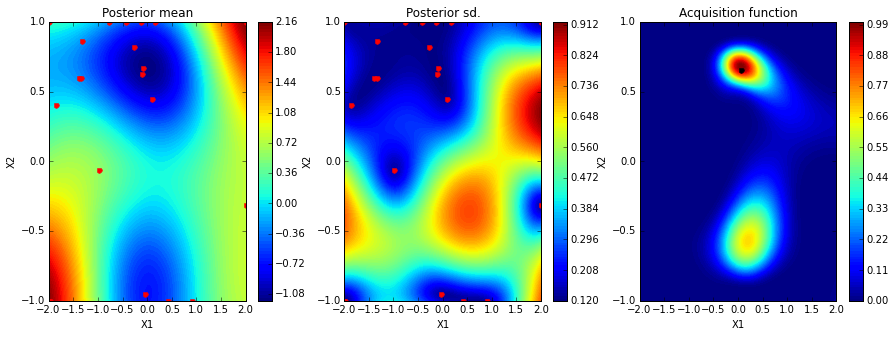

In [22]:
print myBopt2D.model.model
myBopt2D.plot_acquisition()

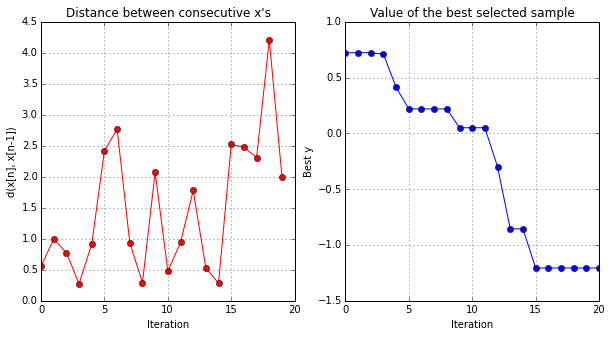

In [23]:
myBopt2D.plot_convergence()

In [21]:
myBopt2D.model.kernel[0][:]

array([ 1.13032995,  0.6229039 ])

[0]


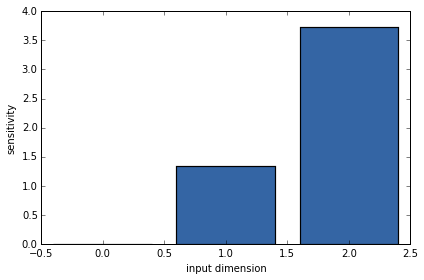

In [26]:
myBopt2D.model.model.obslayer.kern.plot_ARD()
print myBopt2D.model.model.obslayer.X_dim_free

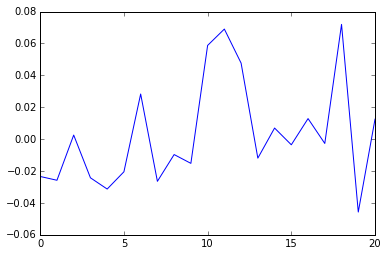

In [31]:
plt.plot(myBopt2D.model.model.obslayer.X.mean[:,0])